## Réaliser par : 
   ####  *MOHAMED BAJADI*
   ####  *IMANE LAKOUIRA*

# ACP

**Problématique générale :**

* Comment regrouper les pays en fonction de leurs caractéristiques économiques et financières afin de mieux comprendre les     similitudes et différences entre les économies ?

* ACP: 
  Comment identifier les principales dimensions expliquant la variance des données pour simplifier leur interprétation, tout en conservant les informations essentielles liées aux relations entre les variables ?

##### 1.préparation de données

In [32]:
#importation des Bibliothèque
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# load les données
df = pd.read_csv('dataset_fin.csv')
df.head(10)

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing
5,5,China (People’s Republic of),2.950706,2022,-0.537945,6.163345,4.393759,2.950706,19420.089201,36.868844,36.868844,4.003145,103.711586,Developing
6,6,Colombia,7.288884,2022,0.105946,10.684351,7.767721,6.402209,22288.171021,45.988443,45.988443,3.515754,103.719188,Emerging
7,7,Costa Rica,4.551492,2022,0.749837,3.426020,2.169231,4.407247,25156.252840,40.020551,40.020551,3.028364,103.726791,Developing
8,8,Czechia,2.847171,2022,-1.212908,0.530761,0.250755,2.903575,28024.334660,42.988951,42.988951,2.540973,103.734393,Developing
9,9,Denmark,1.540173,2022,2.445106,-2.086819,-0.965460,2.387836,29096.936147,44.894187,44.894187,4.183897,104.285216,Emerging


In [34]:
# La Suprission Des Colonnes qui n'a pas de sence pour ce test 
data = df.drop(columns=['Economic_Classification' ,'Government expenditure by fun', 'TIME_PERIOD','Reference area','Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GDP                             49 non-null     float64
 1   Income                          49 non-null     float64
 2   Expenditure                     49 non-null     float64
 3   Components of aggregate demand  49 non-null     float64
 4   Production                      49 non-null     float64
 5   Households                      49 non-null     float64
 6   Government                      49 non-null     float64
 7   Corporations                    49 non-null     float64
 8   Capital                         49 non-null     float64
dtypes: float64(9)
memory usage: 3.6 KB


##### 2.Centrage et Réduction


* But du centrage et réduction
Comparabilité des variables : Utile lorsque les variables sont sur des échelles différentes (exemple : revenu annuel en milliers d'euros et âge en années).

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-9.75885570e-02,  1.86483445e-01,  4.31171754e-01,
         2.14276498e-01, -9.31344764e-02,  1.09626340e+00,
        -5.43547422e-01, -6.42121304e-01,  1.59944833e-14],
       [ 7.55854816e-01, -2.11349144e-01, -7.34134753e-03,
        -1.46737244e-01,  1.03369782e+00,  1.14074261e+00,
         1.38094662e+00, -2.55298518e-01, -7.93046346e-02],
       [ 2.70322645e-01, -1.56681219e-01, -4.04760037e-01,
        -4.91663229e-01,  3.05033926e-01,  7.45702630e-01,
         1.28727471e+00,  3.57961301e-01, -8.33342334e-03],
       [ 2.49684736e-01,  7.66337947e-01,  1.65160500e-01,
         1.42338339e-01,  1.29058907e-01,  5.06957287e-01,
        -5.19249985e-02,  1.00355228e+00,  2.76346145e-01],
       [-7.40611552e-01, -5.89748606e-01, -1.02600027e+00,
        -9.31971770e-01, -7.41347982e-01, -1.32811611e+00,
        -1.69370718e+00,  9.23451396e-02,  2.79198323e-01],
       [-3.25969360e-01, -4.58641735e-01,  3.82862287e-01,
         9.35757332e-01, -4.28268261e-01, -1.029944


L'interprétation d'un centrage et réduction des données :

* Centrage :
  * Le centrage consiste à soustraire la moyenne de chaque variable à ses valeurs respectives. Cela permet d'assurer que chaque variable a une moyenne égale à 0.

  * Cela élimine les effets de l'échelle ou des niveaux initiaux des variables, permettant une meilleure comparaison.

* Réduction
  * La réduction consiste à diviser les valeurs centrées par l'écart-type de la variable. Cela donne une variance égale à 1 pour chaque variable.

  * Cela rend les variables comparables, surtout lorsqu'elles sont exprimées dans des unités ou des échelles différentes.

Le centrage et réduction mettent toutes les variables sur un pied d'égalité en termes d'échelle et de contribution à l'analyse, tout en éliminant les biais dus aux moyennes ou amplitudes initiales.

##### 3. Calcul de la Matrice de Corrélation

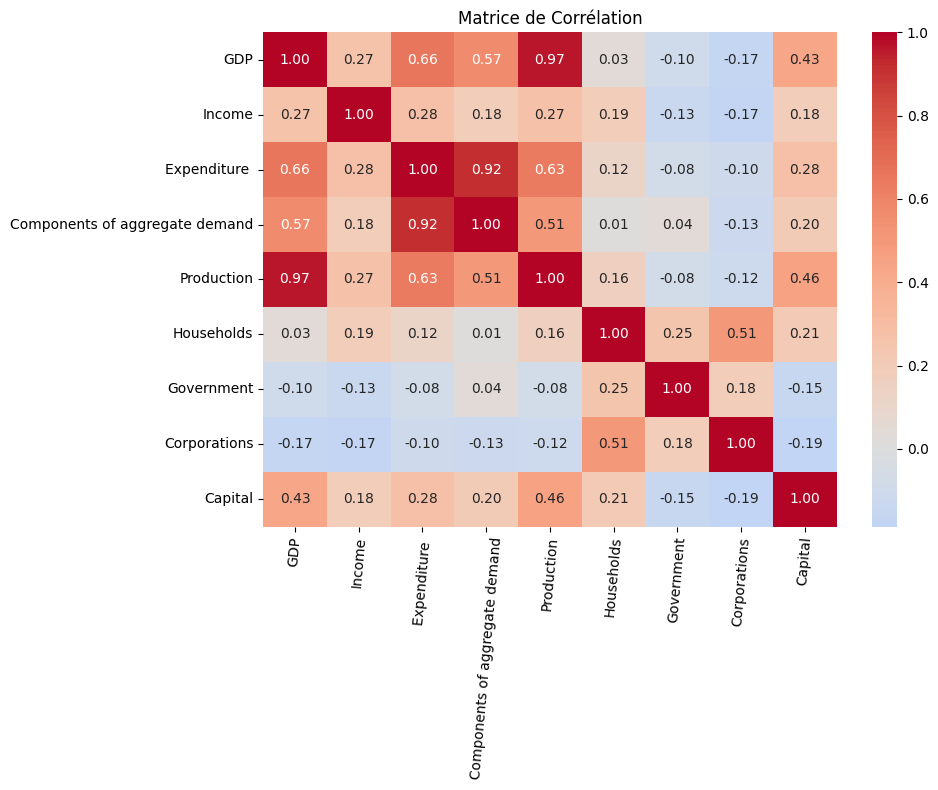

In [36]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=85)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

-> Ce graphique représente une matrice de corrélation, un outil statistique qui mesure la relation linéaire entre deux variables. Chaque valeur de corrélation est comprise entre -1 et 1.
Exemples spécifiques dans la matrice :

* GDP et Production : Corrélation très élevée (0.97), ce qui signifie que ces deux variables évoluent presque toujours ensemble.
* Expenditure et Components of aggregate demand : Corrélation forte (0.92), montrant une relation directe entre ces deux variables.
* GDP et Government : Corrélation faible ou négative (-0.10), ce qui suggère une relation inverse faible ou inexistante entre ces variables.
* Corporations et Capital : Corrélation négative modérée (-0.19), ce qui indique une faible relation inverse entre ces variables.


##### 5. Extraction des Valeurs Propres

* Les valeurs propres représentent la proportion de variance expliquée par chaque composante principale (CP).
* Les vecteurs propres représentent les coefficients (ou poids) associés à chaque variable pour former les composantes principales.

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [3.52 1.65 0.02 0.06 0.3  0.61 0.88 0.81 1.14]
Vecteurs propres :
 [[ 0.48  0.01  0.69 -0.18  0.02  0.45 -0.24  0.   -0.  ]
 [ 0.22  0.   -0.02 -0.02  0.29  0.19  0.77  0.21  0.43]
 [ 0.46 -0.06  0.11  0.73 -0.06 -0.27  0.2  -0.18 -0.3 ]
 [ 0.42 -0.03 -0.15 -0.64  0.08 -0.37  0.2  -0.09 -0.46]
 [ 0.47 -0.06 -0.69  0.06 -0.13  0.45 -0.26  0.01  0.07]
 [ 0.07 -0.66  0.09 -0.12 -0.63 -0.18  0.08  0.    0.31]
 [-0.07 -0.42  0.    0.11  0.18  0.09 -0.05  0.78 -0.41]
 [-0.12 -0.62 -0.03  0.01  0.57  0.15 -0.06 -0.51 -0.02]
 [ 0.29 -0.01 -0.    0.03  0.38 -0.54 -0.43  0.23  0.5 ]]


* Valeurs Porpres:
   * Interprétation :
      * La somme des valeurs propres est égale au nombre de variables (ici, 9).
      * Chaque valeur propre indique la quantité de variance expliquée par une composante principale.
      * Les premières composantes principales (celles avec les plus grandes valeurs propres) capturent la majorité de la variance.
* Vecteurs propres
   * Première composante principale (CP1) :
      * Poids associés : [0.48, 0.22, 0.46, 0.42, 0.47, 0.07, -0.07, -0.12, -0.29].
         * Les coefficients les plus élevés en valeur absolue sont pour :
         GDP (0.48), Expenditure (0.46), Production (0.42), et Capital (0.47).
         * Interprétation : 
         La première composante principale est fortement influencée par des variables économiques globales telles que GDP, 
         Expenditure, Production et Capital.
   * Deuxième composante principale (CP2) :
      * Poids associés : [0.01, 0, -0.06, -0.03, -0.06, -0.66, -0.42, -0.62, -0.01].
         * Les coefficients les plus élevés en valeur absolue sont pour :
           Households (0.66), Government (0.62) et Corporation (0.42).
         * Interprétation : La deuxième composante principale est dominée par les variables liées aux dépenses publiques et 
          aux ménages.

##### 5. Illustration des Composantes Principales

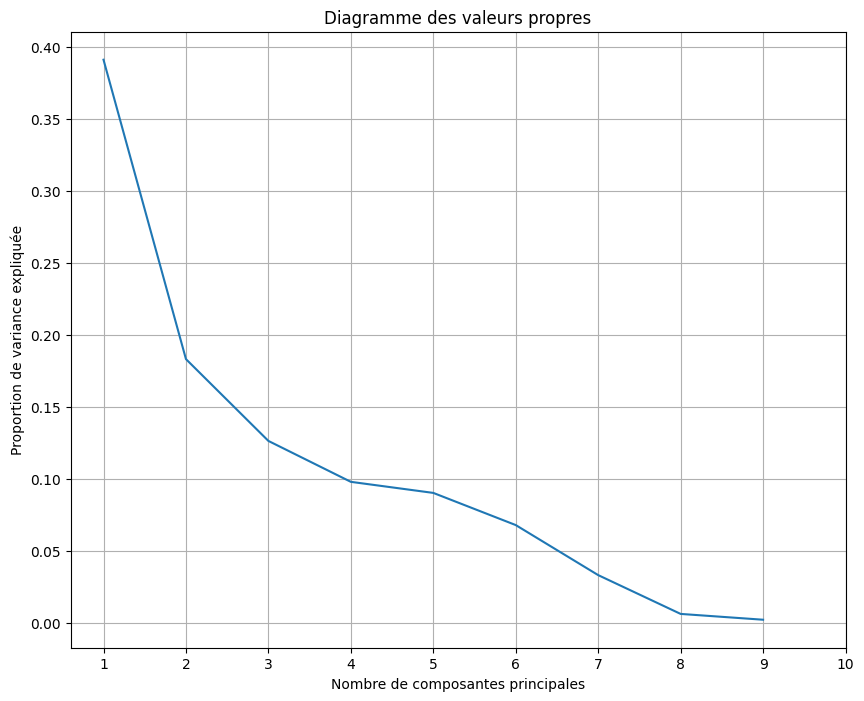

In [38]:
pca = PCA(n_components=len(data.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

* Proportion de variance expliquée :

   * L'axe des ordonnées (y) représente la proportion de variance expliquée par chaque composante principale.
   * L'axe des abscisses (x) correspond au numéro de chaque composante principale.
   * La première composante principale (CP1) explique environ 39 % de la variance totale, la deuxième composante principale 
     (CP2) en explique 19 %, et ainsi de suite. La proportion diminue progressivement.

* Interprétation :
   * Le coudé (ou "elbow") du graphe, souvent visible comme un point d'inflexion, indique le nombre optimal de composantes 
     principales à retenir pour expliquer la majorité de la variance.
   * Dans ce cas, le coudé semble se situer autour de 3 ou 4 composantes principales.
     Cela signifie que les trois ou quatre premières composantes principales suffisent pour capturer l'essentiel de 
     l'information dans les données, avec une perte minimale de variance.

##### 6. Application de l'ACP

 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [39]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

2. Affichage des nouvelles données projetées sur les composantes principales.

In [40]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[ 0.4325931   0.13379861]
 [ 0.72478175  1.21858796]
 [-0.24304185  1.22742958]
 [ 0.48354383  0.95054927]
 [-1.59689393 -1.64395332]
 [ 0.17414254 -0.97139467]
 [ 3.33312056 -0.2463262 ]
 [ 0.07207557 -0.7356244 ]
 [-1.5706677  -0.63006815]
 [-2.50783994 -0.08441742]
 [-2.04011327 -1.10885023]
 [-1.7357618  -0.55503687]
 [-1.71441615 -0.02075409]
 [-2.06715326  0.48771277]
 [-2.10588714  1.95537594]
 [-1.1752599   1.04891322]
 [ 2.09180899  0.00529128]
 [ 0.43179573 -0.24383352]
 [ 3.17512894 -0.15298652]
 [ 2.34384691 -0.75859122]
 [ 1.3279976  -1.38279935]
 [ 4.16581307 -1.21263816]
 [ 2.91943973 -0.22437613]
 [ 0.33910596  0.75611653]
 [-2.32848889  0.74088673]
 [-1.11486777 -0.00763744]
 [-1.1315758  -1.09118804]
 [-1.61868329 -1.24944616]
 [-2.79459771  4.46908158]
 [ 0.23377551 -2.35345468]
 [ 0.98054562  0.94384806]
 [-1.0242533   0.30331642]
 [ 1.46248392 -0.27108845]
 [ 1.19271312 -0.77545954]
 [ 1.9856557   0.41905735]
 [-1.40479281 -0.90637111

* Interprétation :
   * Chaque ligne du tableau représente une observation dans les données transformées.
   * Les colonnes correspondent aux deux premières composantes principales :
      * CP1 (première colonne) : explique la plus grande proportion de la variance.
      * CP2 (deuxième colonne) : explique la deuxième plus grande proportion de la variance.

3.Visualisation des données dans l'espace des deux premières composantes principales.

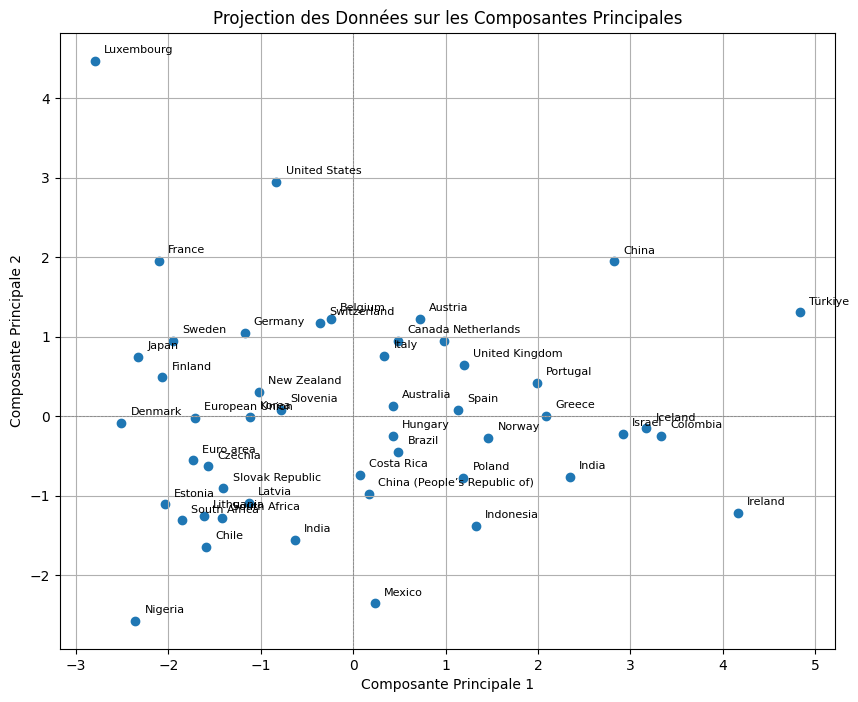

In [41]:
plt.figure(figsize=(10, 8))

# Convertir les noms des pays en une liste
countries = df['Reference area'].tolist()

# Créer le nuage de points
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Points')

# Ajouter les étiquettes pour chaque point
for i, country in enumerate(countries):
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, country, fontsize=8)

# Ajouter les éléments du graphique
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


Le graphique montre la projection des pays sur les deux premières composantes principales (CP1 et CP2).
* Répartition générale :
  * Composante principale 1 (CP1) (axe horizontal) :
    Elle semble représenter une dimension liée à des différences structurelles majeures entre les pays. Les pays très à 
    droite (par exemple, Ireland) sont très distincts de ceux à gauche (comme Nigeria ou Chile).
  * Composante principale 2 (CP2) (axe vertical) :
    Elle capte une autre dimension, potentiellement liée à des caractéristiques secondaires (économiques, sociales ou 
    culturelles). Les pays en haut (par exemple, France, Luxembourg) se différencient fortement de ceux en bas (Mexico, 
    India).

* Pays similaires :
  France et Luxembourg se situent dans une zone proche sur le plan CP1-CP2, suggérant des caractéristiques similaires.
  South Africa, Lithuania, et Estonia forment un groupe dans la partie inférieure gauche.
* Pays distincts :
  Ireland (à l'extrême droite) est isolé sur CP1, suggérant qu'il se distingue nettement des autres pays.
  Nigeria (en bas à gauche) est également très éloigné des autres, indiquant des différences significatives.
* Pays proches du centre :
  Les pays comme Denmark, Euro area, et New Zealand sont proches du centre. Cela indique qu'ils sont relativement "neutres" 
  dans cet espace, sans caractéristiques extrêmes dans les deux premières composantes.


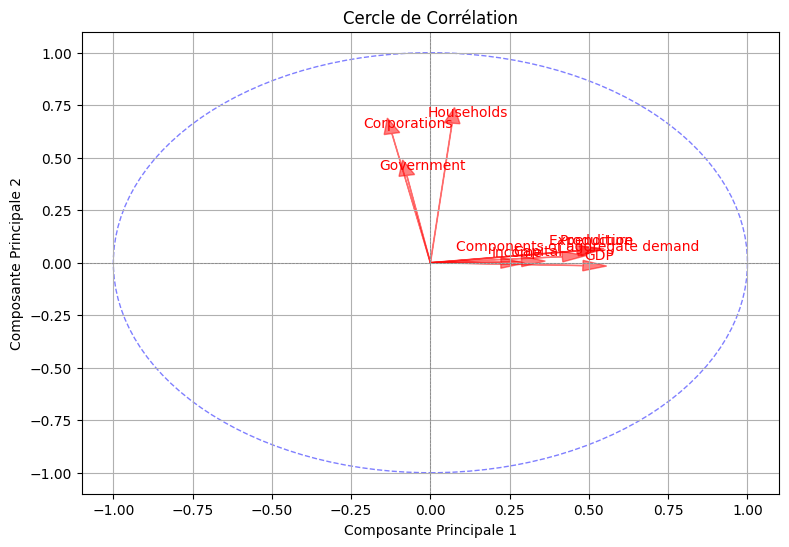

In [42]:
offset = 0.05
plt.figure(figsize=(9,6))
components = pca.components_
variable_names = data.columns.tolist()
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x + offset, y + offset, variable_names[i], color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Interprétation des Positions :

Proche de l'axe CP1 : Les variables proches de l'axe CP1 sont fortement corrélées avec la première composante principale.

Proche de l'axe CP2 : Les variables proches de l'axe CP2 sont fortement corrélées avec la deuxième composante principale.

Proche du bord : Les variables proches du bord du cercle sont bien représentées dans l'espace des composantes principales.

Proche du centre : Les variables proches du centre sont moins bien représentées.

# Classification Automatique

Comment regrouper les observations sur la base des deux premières composantes principales pour révéler des structures ou des similarités au sein des données initiales multivariées ?

### 1.Importation des bibliothèques nécessaires

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import MinMaxScaler

## K-means Clustring

In [44]:
# --- a. K-means clustering ---
# Déterminer le meilleur nombre de clusters avec la méthode "elbow"
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

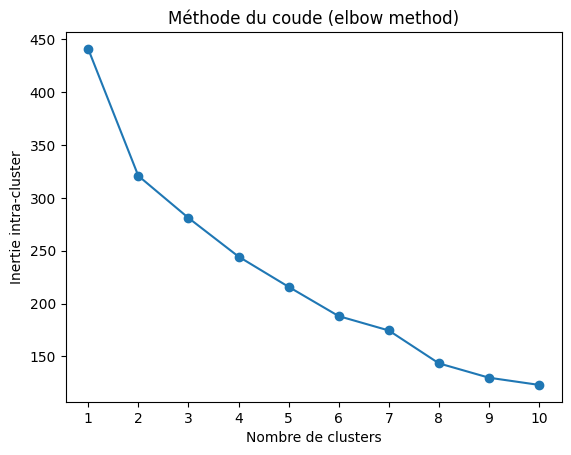

In [45]:
# Visualiser le critère d'inertie
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude (elbow method)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()


##### Interprétation :
 * Axe des X : Représente le nombre de clusters 𝑘.
 * Axe des Y : Représente l'inertie intra-cluster, c'est-à-dire la somme des distances au carré entre chaque point et le             centre de son cluster. Une valeur plus faible indique des clusters plus compacts.

 * Tendance générale :
   L'inertie diminue à mesure que 𝑘 augmente, car plus de clusters permettent une meilleure approximation des données. Cependant, après un certain point, l'amélioration devient négligeable.

 * Point d'inflexion (le "coude") :
   * Le coude correspond au point où la réduction de l'inertie commence à ralentir considérablement.
   * C'est un compromis entre avoir un bon nombre de clusters et éviter un sur-ajustement (trop de clusters).
##### Résultat pour ce graphe :
   En observant le graphe, le coude semble se situer autour de 𝑘=3 ou 𝑘=4. Cela signifie que 3 ou 4 clusters pourraient être un choix raisonnable pour partitionner les données.

In [46]:
# Choisir k (par exemple, k=3) et appliquer K-means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

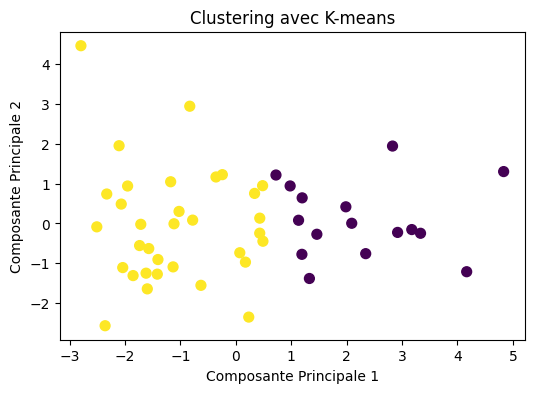

In [47]:
# --- c. Visualisation des résultats (par exemple, avec CP1 et CP2) ---
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Clustering avec K-means")
plt.show()

##### Interprétation :
* Axe X et Axe Y :
  Ils correspondent aux deux premières composantes principales obtenues avec l'ACP. Ces axes synthétisent l'essentiel de la variance des données initiales.
* Couleurs des points :
  Chaque couleur représente un cluster identifié par K-means.
  Dans ce cas, il y a deux clusters (violet, jaune).
* Position des points :
  Les points proches dans l'espace des composantes principales appartiennent à des clusters similaires.
  Les frontières entre les clusters montrent les différences détectées par l'algorithme.

In [48]:
from sklearn.metrics import silhouette_score
# Évaluer la qualité des clusters avec l'indice de silhouette
score = silhouette_score(X_pca, df['Cluster'])
print(f"Indice de silhouette pour K-means : {score:.2f}")

Indice de silhouette pour K-means : 0.40


##### Analyse de la qualité du clustering :
  Les clusters semblent bien séparés, en particulier les clusters violet et jaune.
  Le cluster vert a une dispersion plus élevée, ce qui peut indiquer une certaine variabilité dans ce groupe.

In [49]:
# Créer une liste pour stocker les sous-tables par cluster
clusters = []

# Parcourir les clusters uniques
for cluster in sorted( df['Cluster'].unique()):
    # Filtrer les lignes correspondant au cluster courant
    cluster_table = df[df['Cluster'] == cluster]
    clusters.append(cluster_table)
    print(f"Cluster {cluster}:")
    print(cluster_table)
    print("\n")
   

Cluster 0:
    Unnamed: 0  Reference area       GDP  TIME_PERIOD     Income  \
1            1         Austria  5.277894         2022   0.676556   
6            6        Colombia  7.288884         2022   0.105946   
16          16          Greece  5.743649         2022   7.695864   
18          18         Iceland  8.992508         2022   0.578997   
19          19           India  6.987039         2022   2.093221   
20          20       Indonesia  5.307419         2022   3.607445   
21          21         Ireland  8.619503         2022   5.121668   
22          22          Israel  6.640633         2022   3.325195   
30          30     Netherlands  5.007235         2022   1.092674   
32          32          Norway  3.005635         2022  30.729931   
33          33          Poland  5.255459         2022   4.659426   
34          34        Portugal  6.985842         2022   4.091959   
38          38           Spain  6.179312         2022   3.793980   
41          41         Türkiye  5.533

## K-medoids clustering

In [50]:
k_values = range(2, 12)  # Tester k de 2 à 10
def calculate_inertia(data, k_range):
    inertia_scores = []
    for k in k_range:
        # Initialisation aléatoire des indices des médoïdes
        initial_medoids = np.random.choice(len(data), k, replace=False)
        kmedoids_instance = kmedoids(data, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
        kmedoids_instance.process()
        
        # Calculer la somme des distances intra-cluster
        clusters = kmedoids_instance.get_clusters()
        medoids = kmedoids_instance.get_medoids()
        inertia = 0
        for cluster_id, cluster_points in enumerate(clusters):
            for point_idx in cluster_points:
                # Ajouter la distance entre chaque point et son médoïde
                inertia += np.linalg.norm(data[point_idx] - data[medoids[cluster_id]])
        inertia_scores.append(inertia)
    return inertia_scores

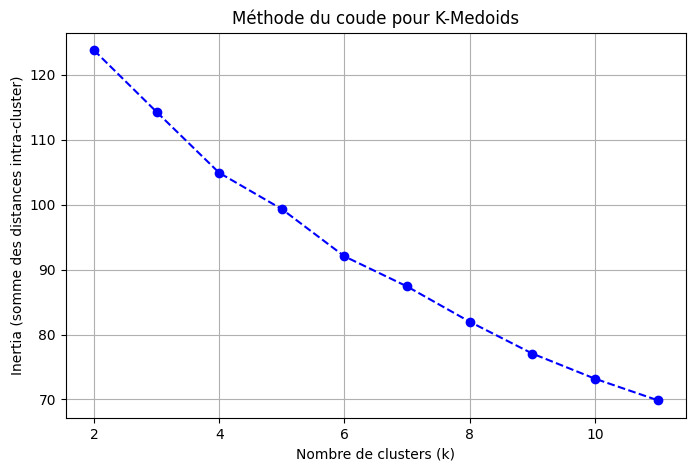

In [51]:
inertia_scores = calculate_inertia(X_scaled, k_values)

# Visualisation des scores d'inertia (méthode du coude)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o', linestyle='--', color='blue')
plt.title("Méthode du coude pour K-Medoids")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (somme des distances intra-cluster)")
plt.grid()
plt.show()

##### Interprétation :
 * Axe X :
   Représente le nombre de clusters 𝑘.
 * Axe Y :
  Correspond à l'inertie (somme des distances intra-cluster), qui mesure la compacité des clusters.
  Une inertie plus faible indique des clusters plus compacts.
 * Courbe décroissante :
   Lorsque 𝑘 augmente, l'inertie diminue car les points sont répartis sur plus de clusters, ce qui réduit les distances intra-cluster.
 * Méthode du coude :
   On cherche un point où la diminution de l'inertie ralentit significativement, formant un "coude" dans la courbe.
   Ce point représente un compromis optimal entre la compacité des clusters et leur nombre.
##### Analyse :
Sur ce graphique, le coude semble se situer autour de 𝑘=4 ou 𝑘=5.
Cela suggère que 4 ou 5 clusters pourraient être un choix optimal pour segmenter les données en utilisant K-medoids.

In [52]:
k = 4
initial_medoids = np.random.choice(len(X_pca), k, replace=False)
kmedoids_instance = kmedoids(X_scaled, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_instance.process()

# Récupérer les clusters
clusters = kmedoids_instance.get_clusters()
labels = np.zeros(len(X_pca))
for cluster_id, cluster_points in enumerate(clusters):
    labels[cluster_points] = cluster_id


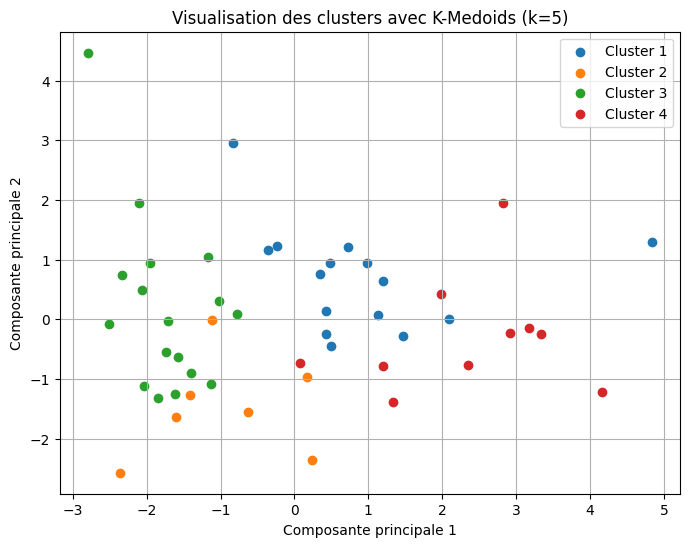

In [53]:


# Visualisation des clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(X_pca[labels == cluster_id, 0], X_pca[labels == cluster_id, 1], label=f'Cluster {cluster_id + 1}')
    
plt.title("Visualisation des clusters avec K-Medoids (k=5)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()

Chaque couleur représente un cluster distinct parmi les 5 identifiés par K-Medoids (Cluster 1 à Cluster 4).
Les points de même couleur appartiennent au même cluster.
Position des points :

Les points dans un cluster sont plus proches de leur médoïde (centre du cluster).
Les clusters semblent bien séparés dans certaines zones, bien que des chevauchements soient visibles (notamment entre Cluster 1 et Cluster 2).
Répartition des clusters :

Le Cluster 2 (orange) regroupe des individus dispersés dans la partie droite du graphique.
Le Cluster 3 (vert) occupe une zone centrale relativement dense.
Les Clusters 1 (bleu) et 4 (rouge) se situent principalement sur la gauche avec quelques chevauchements.


## DBSCAN clustering

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

**Détermination du paramètre epsilon**

Nous utilisons la méthode du graphe des k-distances pour choisir une valeur appropriée pour epsilon :

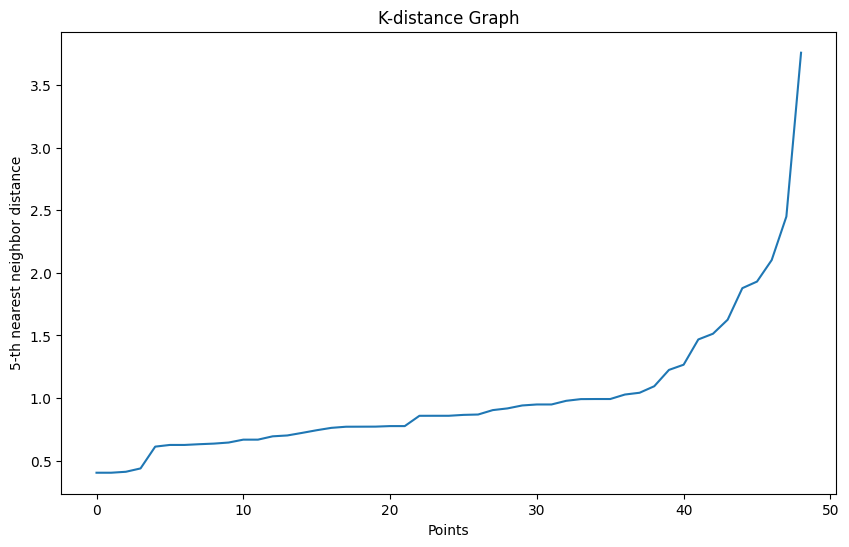

In [55]:
# Function to plot k-distance graph
def plot_k_distance_graph(X_scaled, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_pca)
    distances, _ = neigh.kneighbors(X_pca)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10,6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_pca, k=5)

**Description du Graphique :** 
* Axe X (Points) :
   Correspond aux points de données triés en fonction de leur distance au 5ᵉ voisin le plus proche (car 𝑘=5).
* Axe Y (5ᵉ nearest neighbor distance) :
  Montre la distance au 5ᵉ plus proche voisin pour chaque point, triée dans l'ordre croissant.
* La Forme du Graphique :
  Une partie relativement plate (faibles valeurs de distance) indique que les points sont proches les uns des autres dans des régions densément peuplées.
  Une "coudée" (augmentation abrupte) apparaît lorsque la distance augmente considérablement. Cela signale la transition entre des points denses (dans des clusters) et des points éloignés (potentiellement bruit ou en bordure).

**Interprétation des Résultats :**

* Coudée dans le Graphique :
La transition abrupte visible vers la fin du graphique (aux environs de 𝑦≈2.5) correspond à la coudée ou "knee".
Ce point indique le seuil idéal (𝜀) pour la distance maximale entre points pour former un cluster.
Valeur de 𝜀:
À partir de ce graphique, une valeur de 𝜀 d’environ 2.5 à 3.0 semble appropriée pour DBSCAN.
* Points au-delà de la Coudée :
  Les points situés après la coudée (ayant des distances plus élevées) sont probablement des points de bruit ou isolés, car ils ne font pas partie d'une région dense.

**Réalisation du clustering DBSCAN**

In [56]:
# Perform DBSCAN clustering
epsilon = 1.5 # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_pca)

**Visualisation des résultats**

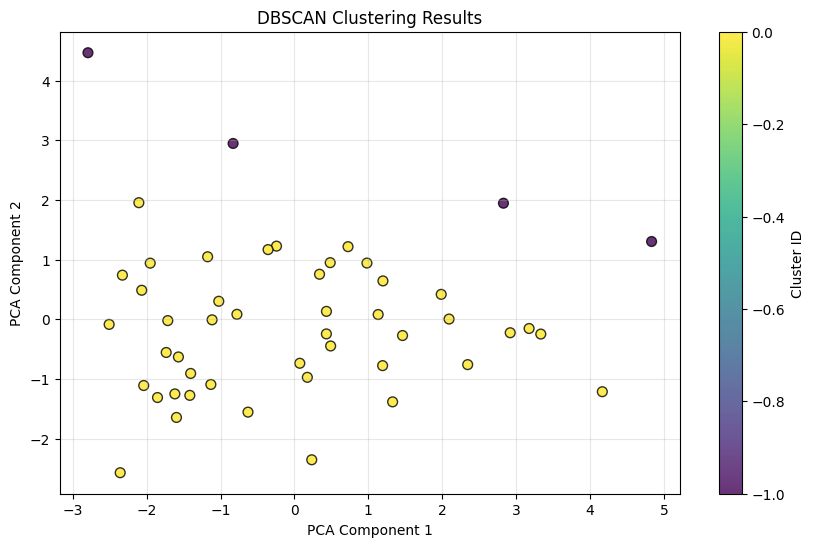

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des résultats de DBSCAN
plt.figure(figsize=(10, 6))

# Scatter plot avec les clusters
scatter = plt.scatter(
    X_pca[:, 0],  # Première composante PCA
    X_pca[:, 1],  # Deuxième composante PCA
    c=clusters,  # Les étiquettes des clusters générées par DBSCAN
    cmap='viridis',  # Palette de couleurs
    s=50,  # Taille des points
    edgecolor='k',  # Bordure noire pour améliorer la visibilité
    alpha=0.8  # Transparence pour mieux voir les superpositions
)

# Ajout d'une barre de couleur
plt.colorbar(scatter, label="Cluster ID")

# Labels et titre
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Grille pour améliorer la lecture
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()


* Axes (PCA Component 1 et PCA Component 2) :

  Les deux premières composantes principales sont utilisées pour projeter les données dans un espace bidimensionnel.

* Points colorés par cluster :

  Les points en jaune appartiennent au cluster principal identifié par DBSCAN.
  Les points en violet (valeur négative dans la barre de couleur) sont classés comme bruit (points isolés ou hors des zones denses).

**Interprétation :**

DBSCAN a identifié un cluster significatif dans les données, correspondant aux points en jaune.
Les points en violet n'ont pas satisfait les critères de densité (distance 𝜀 min_sample) et sont donc considérés comme du bruit.

Noise points: 4
Cluster 0: 45 points


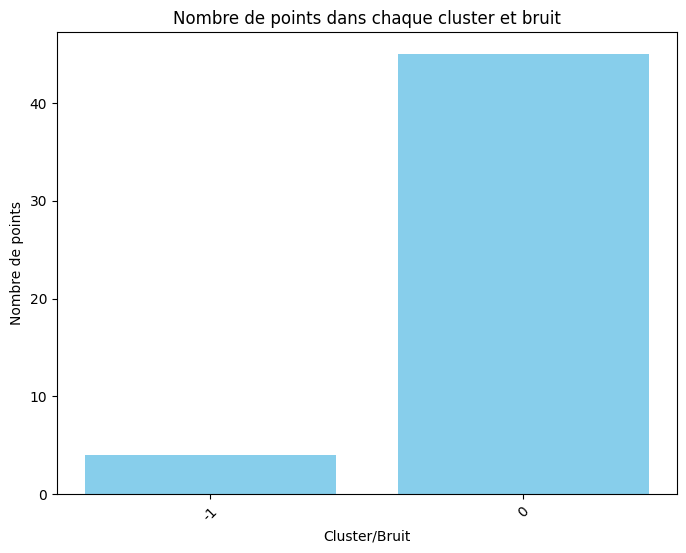

In [58]:
# Compter le nombre de points dans chaque cluster et bruit
unique, counts = np.unique(clusters, return_counts=True)

# Print number of clusters and noise points
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f'Noise points: {count}')
    else:
        print(f'Cluster {cluster}: {count} points')


# Tracer les résultats
plt.figure(figsize=(8, 6))
plt.bar(unique.astype(str), counts, color='skyblue')
plt.title('Nombre de points dans chaque cluster et bruit')
plt.xlabel('Cluster/Bruit')
plt.ylabel('Nombre de points')
plt.xticks(rotation=45)
plt.show()

* Axes :

  Axe X : Représente les catégories — un cluster (>) et le bruit (𝑂).
  Axe Y : Représente le nombre de points dans chaque catégorie.

* Barres :

  La barre du bruit (𝑂) est plus grande, indiquant qu'une majorité de points n'ont pas été assignés à un cluster (classification comme bruit).
  La barre du cluster principal (>) est plus petite, avec moins de points assignés.

* Interprétation :

  DBSCAN a été strict dans sa classification, détectant un seul cluster dense mais rejetant beaucoup de points comme bruit.
  Cela peut indiquer que les paramètres 𝜀 ou min_samples sont trop restrictifs.

* Analyse Globale:

  Points détectés comme bruit (bruit élevé) :
 
    Une proportion importante de points est considérée comme bruit. Cela peut refléter que les données sont dispersées ou que les critères de densité sont trop stricts.

  Cluster principal :
     Le cluster identifié est compact et satisfait les conditions de densité. Il peut représenter un groupe homogène de données dans l'espace PCA.


## Classification ascendante hiérarchique :

### Visualisation de la structure hiérarchique avec des dendrogrammes :

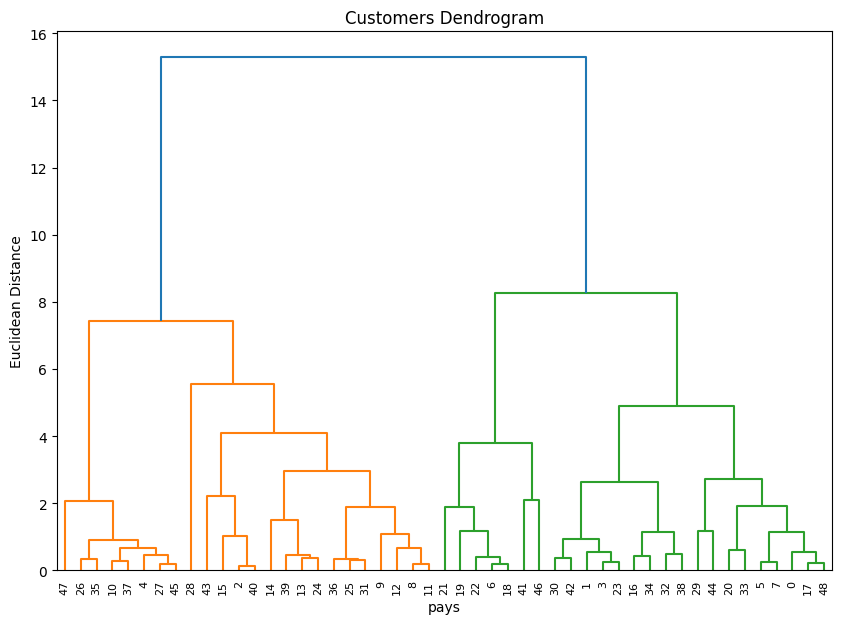

In [59]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Configurer la figure
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Sélectionner les données (ici les données PCA)
selected_data = X_pca

# Générer les clusters hiérarchiques
clusters = shc.linkage(selected_data, method='ward', metric="euclidean")

# Tracer le dendrogramme
shc.dendrogram(Z=clusters)

# Ajouter des labels aux axes
plt.xlabel("pays")  # Exemple : identifier les échantillons
plt.ylabel("Euclidean Distance")  # Distance utilisée pour regrouper les clusters

# Afficher le graphique
plt.show()


1. Axes du graphique :
Axe X (Samples) : Les indices des échantillons (ou points de données). Chaque échantillon est un point individuel au bas de l’arbre.
Axe Y (Euclidean Distance) : La distance ou dissimilarité entre les groupes ou échantillons.
2. Regroupement des points :
L’arbre montre comment les échantillons (points de données) sont regroupés par étapes successives.
Les échantillons proches sont regroupés en fonction de la distance euclidienne.
Plus la distance (axe Y) entre deux groupes est petite, plus leurs points sont similaires.

### Determination de clusters :

Text(0, 0.5, 'Euclidean Distance')

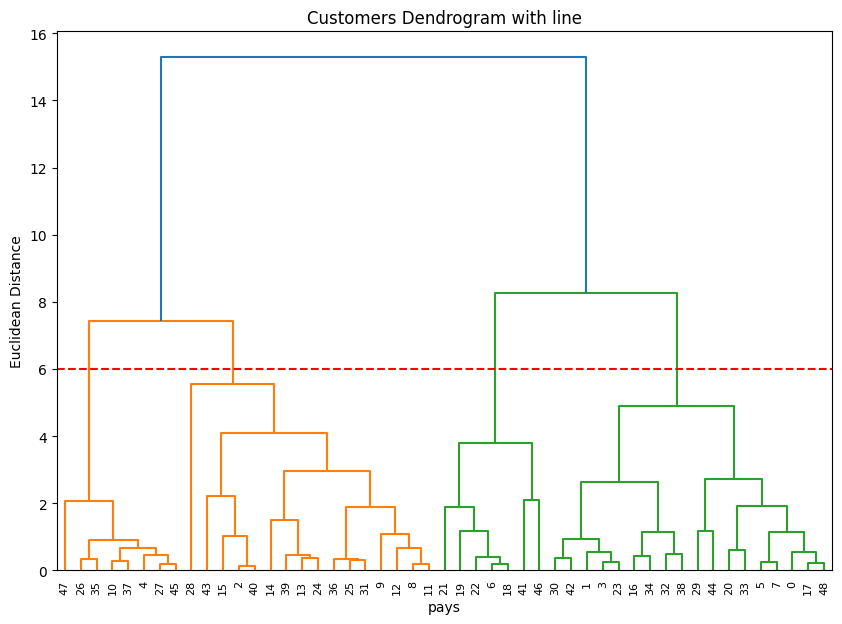

In [60]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 6, color = 'r', linestyle = '--')
plt.xlabel("pays")  # Exemple : identifier les échantillons
plt.ylabel("Euclidean Distance")  # Distance utilisée pour regrouper les clusters


* Ligne rouge (seuil de coupe) :
  La ligne rouge horizontale indique le seuil fixé pour diviser les groupes.
  **Dans cet exemple :**
  La ligne rouge est à une distance d’environ 5.
  Tous les regroupements coupant cette ligne définissent des clusters (groupes indépendants).
* Clusters identifiés :
  Les deux couleurs principales (orange et vert) indiquent deux clusters principaux au seuil donné.
  Cluster 1 (orange) : Inclut des échantillons situés à gauche de l’arbre.
  Cluster 2 (vert) : Inclut les échantillons situés à droite.
* Interprétation générale :
  Les données présentent deux groupes principaux avec une certaine similarité interne.
  Si on abaissait la ligne rouge (seuil), davantage de petits clusters apparaîtraient. Inversement, en élevant la ligne rouge, on obtiendrait moins de clusters.


### Implémentation d'un clustering hiérarchique agglomératif :

In [61]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
print(clustering_model.labels_)


[1 1 0 1 3 1 2 1 0 0 3 0 0 0 0 0 1 1 2 2 1 2 2 1 0 0 3 3 0 1 1 0 1 1 1 3 0
 3 1 0 0 2 1 0 1 3 2 3 1]


La ligne imprimée représente les étiquettes de clusters attribuées à chaque point dans le jeu de données selected_data.
Chaque valeur correspond à l'étiquette d'un cluster (entre 0 et 4, car vous avez demandé 5 clusters).

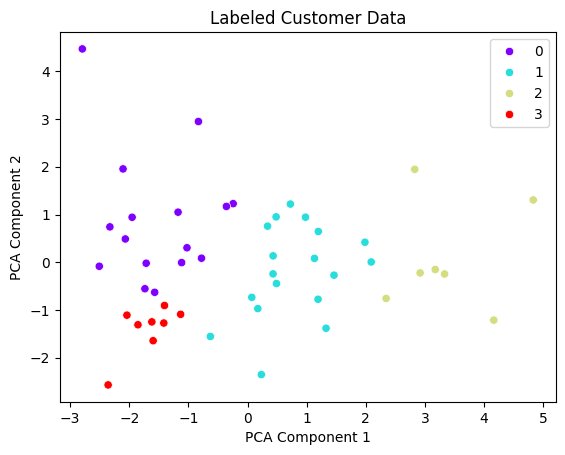

In [62]:
sns.scatterplot(
    x=X_pca[:, 0],  # Correctly specify the x-axis values
    y=X_pca[:, 1],  # Correctly specify the y-axis values
    hue=clustering_model.labels_,  # Use the cluster labels for color coding
    palette="rainbow"  # Choose the color palette for the clusters
).set_title('Labeled Customer Data')

plt.xlabel('PCA Component 1')  # Label for x-axis
plt.ylabel('PCA Component 2')  # Label for y-axis
plt.show()

* On observe une certaine séparation entre les clusters, notamment :
   Le cluster  2 (vert clair) semble distinct , situé principalement dans la partier droite du graphique.
   
   Les clusters 1 (cyan) ,3 (rouge),et  0(violet) semblent plus proches les uns des autres, avec un certain chevauchement, ce qui suggère qu'ils pourraient être moins distincts en termes des deux premières composantes principales.

# AFD

### *Poblématique :*
Quels indicateurs économiques ( Income, Expenditure, etc.) permettent de mieux discriminer les classifications économiques (Emerging, Developing) des pays ?

### 1. Importation des bibliothèques

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder

### 2. Chargement et Préparation des Données

In [ ]:
dataset = pd.read_csv('dataset_fin.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identification des variables explicatives et cible
X = dataset[[ 'Income', 'Expenditure ','Components of aggregate demand', 
             'Production', 'Households', 'Government',
             'Corporations', 'Capital']]
y = dataset['Economic_Classification']


In [ ]:
X.head()

,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Corporations,Capital
0,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,2.826235,102.959793
1,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,3.702775,102.748410
2,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,5.092422,102.937581
3,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,6.555331,103.696381
4,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,4.490536,103.703984


In [ ]:
df = X.join(pd.Series(y, name='class'))

#### a.Calcul des moyennes des variables par classe

In [ ]:
# Calcul des moyennes des features pour chaque classe
class_feature_means = pd.DataFrame(columns=y.unique())

# Sélectionner uniquement les colonnes numériques de X
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Grouper par classe (Economic_Classification) et calculer les moyennes
for c, rows in X.assign(target=y).groupby('target'):
    class_feature_means[c] = rows[numeric_cols].mean()


#### b.Calcul de la matrice de dispersion intra-classe

In [ ]:
# Initialiser la matrice de dispersion intra-classes
num_features = X.shape[1]  # Nombre de variables explicatives
within_class_scatter_matrix = np.zeros((num_features, num_features))

# Calcul de la matrice de dispersion intra-classes
for c, rows in X.assign(target=y).groupby('target'):
    rows = rows.drop(['target'], axis=1)  # Retirer la colonne cible
    
    s = np.zeros((num_features, num_features))
    for index, row in rows.iterrows():
        x = row.values.reshape(num_features, 1)  # Transformer la ligne en vecteur colonne
        mc = class_feature_means[c].values.reshape(num_features, 1)  # Moyenne de la classe
        
        s += (x - mc).dot((x - mc).T)  # Calculer la contribution de la ligne
    
    within_class_scatter_matrix += s  # Ajouter la contribution de la classe


#### c. Calcul de la matrice de dispersion inter-classe

In [ ]:
# Calcul des moyennes globales pour chaque feature
feature_means = X.mean()

# Initialiser la matrice de dispersion inter-classes
num_features = X.shape[1]  # Nombre de variables explicatives
between_class_scatter_matrix = np.zeros((num_features, num_features))

# Calculer la matrice de dispersion inter-classes
for c in class_feature_means.columns:  # Pour chaque classe
    # Taille de la classe
    n = len(y[y == c])
    
    # Moyenne de la classe et moyenne globale (reshaped en vecteurs colonnes)
    mc = class_feature_means[c].values.reshape(num_features, 1)  # Moyenne pour la classe c
    m = feature_means.values.reshape(num_features, 1)           # Moyenne globale
    
    # Mise à jour de la matrice de dispersion inter-classes
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

between_class_scatter_matrix


array([[ 3.1878e+02,  2.0515e+02,  1.0343e+02,  1.7917e+02,  2.2265e+05,
        -1.6592e+02, -4.0145e+01,  1.5394e+02],
       [ 2.0515e+02,  1.7728e+02,  8.6800e+01,  1.5156e+02,  1.2781e+05,
        -1.5448e+02, -3.0451e+01,  1.3638e+02],
       [ 1.0343e+02,  8.6800e+01,  4.2607e+01,  7.4343e+01,  6.5321e+04,
        -7.5163e+01, -1.5089e+01,  6.6632e+01],
       [ 1.7917e+02,  1.5156e+02,  7.4343e+01,  1.2974e+02,  1.1274e+05,
        -1.3147e+02, -2.6261e+01,  1.1641e+02],
       [ 2.2265e+05,  1.2781e+05,  6.5321e+04,  1.1274e+05,  1.6080e+08,
        -9.9572e+04, -2.6460e+04,  9.4752e+04],
       [-1.6592e+02, -1.5448e+02, -7.5163e+01, -1.3147e+02, -9.9572e+04,
         1.3664e+02,  2.5760e+01, -1.1945e+02],
       [-4.0145e+01, -3.0451e+01, -1.5089e+01, -2.6261e+01, -2.6460e+04,
         2.5760e+01,  5.5263e+00, -2.3192e+01],
       [ 1.5394e+02,  1.3638e+02,  6.6632e+01,  1.1641e+02,  9.4752e+04,
        -1.1945e+02, -2.3192e+01,  1.0511e+02]])

**Interprétation :**
* Les grandes valeurs sur la diagonale (par ex., 2.2265×10^5)     indiquent une forte variabilité pour la variable correspondante.
* Les petites valeurs ou valeurs proches de 0 indiquent une faible variabilité ou indépendance (dans le cas des covariances).
* Les valeurs négatives dans les éléments hors diagonale montrent une relation inverse entre les variables.


#### d. Calcul des valeurs propres et vecteurs propres

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(
    np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix)
)


In [ ]:
# Création des paires (valeur propre absolue, vecteur propre correspondant)
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Tri des paires par valeur propre absolue (ordre décroissant)
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

# Affichage des valeurs propres triées
for i, pair in enumerate(pairs):
    print(f"Valeur propre {i + 1}: {pair[0]}")


Valeur propre 1: 2.7839893875065687
Valeur propre 2: 0.11446352621793772
Valeur propre 3: 1.3682705261693708e-16
Valeur propre 4: 1.1646356905690034e-16
Valeur propre 5: 1.0428140702340248e-16
Valeur propre 6: 6.376181348545577e-17
Valeur propre 7: 6.376181348545577e-17
Valeur propre 8: 1.2387553810603815e-17


**Interprétation des valeurs propres :**
* Valeur propre 1 : 
  * 𝜆1=2.784 :
     Cette valeur est la plus élevée, ce qui indique que le premier axe discriminant (LD1) est celui qui explique le mieux la séparation entre les classes.
     Il capture la majorité de la variance inter-classes.
* Valeur propre 2 : 
  * 𝜆2=0.114 :
     Cette valeur est significativement plus petite que 𝜆1 , mais elle montre que le second axe discriminant (LD2) apporte encore une contribution mesurable à la discrimination des classes.
     La différence entre 𝜆1 et 𝜆2 souligne que l’essentiel de la séparation est contenu dans LD1.
* Valeurs proches de zéro (𝜆3 à 𝜆8) :
  Ces valeurs (par exemple, 1.37×10^−16 ) sont très faibles, indiquant que les axes associés (LD3 à LD8) n’apportent pratiquement aucune information utile à la discrimination.
  Ces axes peuvent être ignorés dans l’interprétation, car ils sont numériquement insignifiants.

#### e. Calcul de la variance expliquée

In [ ]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {:.2%}'.format(i, (pair[0] / eigen_value_sums).real))


Explained Variance
Eigenvector 0: 96.05%
Eigenvector 1: 3.95%
Eigenvector 2: 0.00%
Eigenvector 3: 0.00%
Eigenvector 4: 0.00%
Eigenvector 5: 0.00%
Eigenvector 6: 0.00%
Eigenvector 7: 0.00%


**Interprétation :**
* Réduction de la dimensionnalité : 
   Les deux premiers axes (LD1 et LD2) suffisent pour capturer 100% de la variance inter-classes.
   Vous pouvez réduire l’espace discriminant à 2 dimensions (projection sur LD1 et LD2) sans perte significative d’information.
* Importance de LD1 :
  Avec 96.05% de variance expliquée, LD1 est l’axe principal. Il est responsable de la quasi-totalité de la séparation entre les classes.
* Rôle de LD2 :
  LD2 joue un rôle mineur mais non négligeable. Il peut révéler des distinctions subtiles entre des classes qui ne seraient pas visibles sur 
  LD1seul.
* Inutilité des autres axes (LD3 à LD8) :
  Ces axes n’apportent pas d’information supplémentaire utile à la discrimination des classes.
  Ils peuvent être ignorés dans l’interprétation ou visualisation des résultats.

In [ ]:
# Créer la matrice W en empilant les deux premiers vecteurs propres (dimension 8x1)
w_matrix = np.hstack((pairs[0][1].reshape(8, 1), pairs[1][1].reshape(8, 1))).real

# Afficher la matrice W (composantes discriminantes)
print("Matrice W :")
print(w_matrix)


Matrice W :
[[ 1.5486e-01 -1.9108e-01]
 [-2.3907e-01  5.6070e-01]
 [ 6.1870e-01 -7.6031e-01]
 [ 6.9145e-01 -9.4492e-03]
 [ 1.4510e-06 -7.8183e-05]
 [-4.3215e-02  9.6832e-03]
 [ 6.3104e-02  1.6606e-01]
 [ 2.2830e-01  2.0804e-01]]


**Interprétation :**
* Colonne 1 (LD1) :

  Les coefficients de la première colonne montrent l’importance relative des variables explicatives dans la construction du premier axe discriminant (LD1), qui explique 96.05% de la variance inter-classes.

  * Variables ayant une contribution importante :
    * Variable 3 (0.6187)
    * Variable 4 (0.69145)
    * Ces deux variables jouent un rôle majeur dans la discrimination des classes sur LD1.

* Colonne 2 (LD2) :

  Les coefficients de la deuxième colonne montrent l’importance relative des variables explicatives dans la construction du second axe discriminant (LD2), qui explique 3.95% de la variance inter-classes.
  
  * Variables ayant une contribution importante :
    * Variable 3 (−0.76031)
    * Variable 2(0.5607)
    * Variable 8 (0.20804)
    Ces variables apportent des informations subtiles supplémentaires pour différencier les classes.


### Projection des données sur les axes discriminants

In [ ]:
#Nouvelles...
X_lda = np.array(X.dot(w_matrix))

In [ ]:
#Codage...
le = LabelEncoder()
y = le.fit_transform(df['class'])

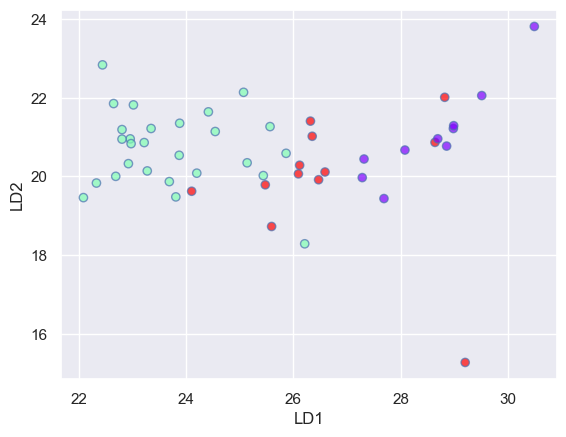

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

Les deux axes LD1 (axe discriminant principal) et LD2 semblent offrir une bonne séparation entre les deux classes.
Les points en bleu et en rouge (probablement représentant différentes classes économiques) montrent un chevauchement modéré, mais LD1 semble discriminer davantage les classes.

les points de différentes classes se chevauchent, cela indique que les variables explicatives ne suffisent pas pour une discrimination claire.

### Application de l’AFD avec scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [ ]:
#Variance expliquée par les axes
lda.explained_variance_ratio_

array([0.9605, 0.0395])

#### Visualisation des données projetées

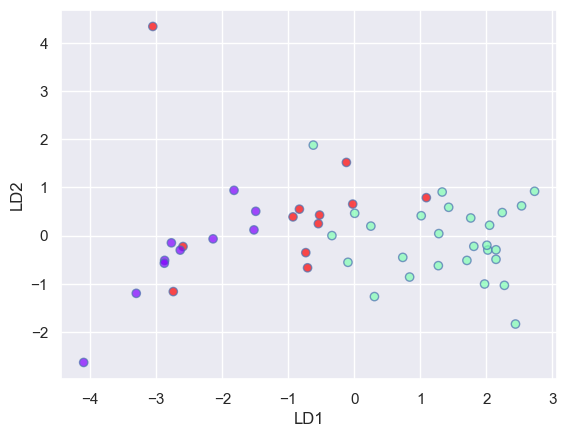

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

Sur cette visualisation, la séparation entre les deux groupes (probablement les classes économiques "Emerging" et "Developing") est plus nette le long de l'axe LD1. Cela signifie que l'axe LD1 capte désormais les informations les plus discriminantes.
Les points bleus et rouges (classes distinctes) montrent moins de chevauchement par rapport au graphique précédent, ce qui témoigne d'une meilleure capacité discriminante après transformation.



* Les classes (différentes couleurs) sont désormais mieux séparées dans cet espace discriminant, surtout le long de LD1.
* Les points de la classe à droite (en cyan) sont clairement distincts des points des autres classes.
* Le graphique montre que les groupes peuvent être rangés dans des zones spécifiques de cet espace.
* Cela indique que l'AFD a permis d'identifier les directions où les groupes se distinguent le mieux.

 # Régression linéaire simple

### Problématique



##### Quelle est la relation entre la production d'une économie et son Produit Intérieur Brut (BIP), et comment les variations de la production influencent-elles la santé économique d'un pays ?

#### Étape 1 : Préparation des Données

Importez les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

#### Étape 2 : Chargement de jeu de données 

In [ ]:
data = pd.read_csv('dataset_fin.csv')

In [ ]:
data.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


#### Étape 3: Sélection des variables

1-Définir les variables 'Production' et 'GDP' comme variables indépendante (X) et dépendante (y).

In [ ]:
# define le variable independant  x
X = data['Production']
# define le variable dependant  y
y = data['GDP']
# ajouter un colonne contient des '1' (y=ax+1*b)
X = sm.add_constant(X)

#### Étape 4 : Nuage de points

1-Un nuage de points est créé pour visualiser la relation entre la production et le Produit Intérieur Brut  (PIB).

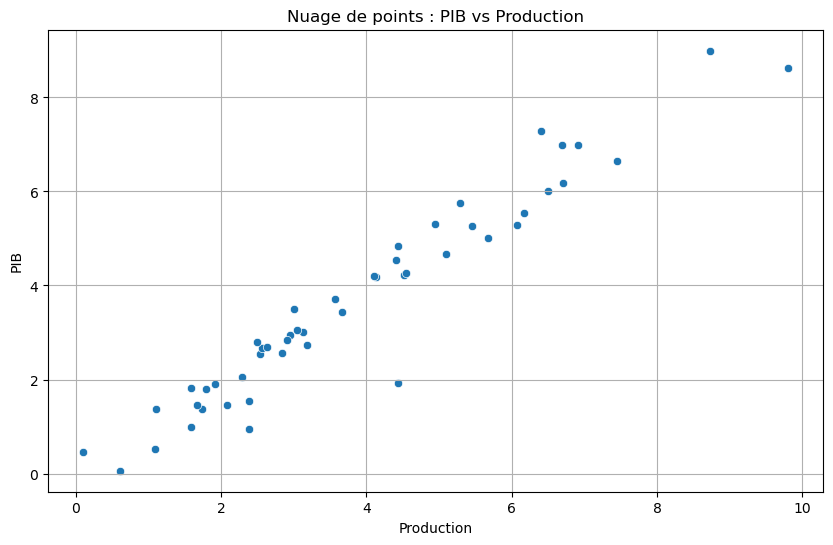

In [ ]:
# Creer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production', y='GDP', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : PIB vs Production')
plt.xlabel('Production')
plt.ylabel('PIB')
plt.grid(True)

# Afficher le graphique
plt.show()


 **Intérprétation**
 
 le graphique révèle une corrélation positive entre la production et le PIB,indiquant qu'à mesure que la production augmente, le PIB tend également à augmenter.

#### Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [ ]:
# creation d'un modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

#### Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre Advertisements et les Sales.

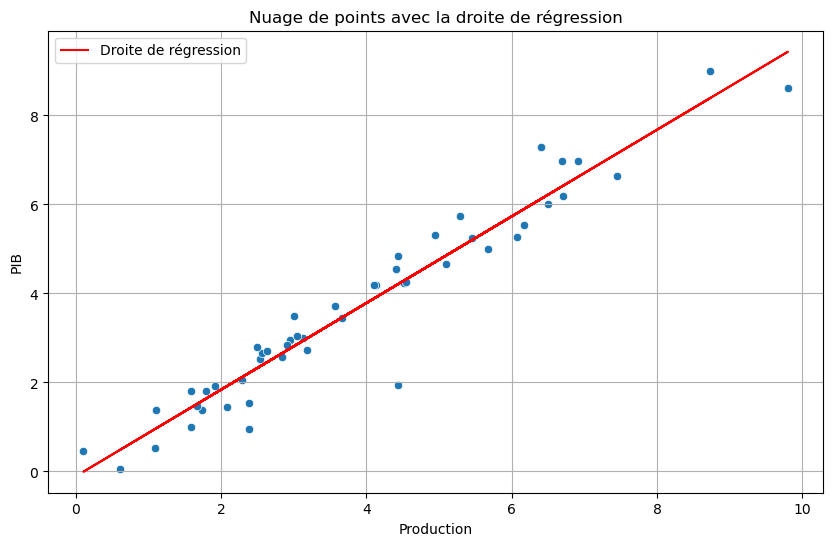

In [ ]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production', y='GDP', data=data)
plt.plot(data['Production'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('Production')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()



**Intérprétation**

 -L'ajout d'une droite de régression au nuage de points permet de visualiser la relation linéaire entre la production et le PIB en indiquant une tendance générale où une augmentation de la production est associée à une hausse du PIB..

-La droite de régression représente la meilleure approximation linéaire des données, en minimisant la distance entre les points et la droite.


#### Étape 6 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

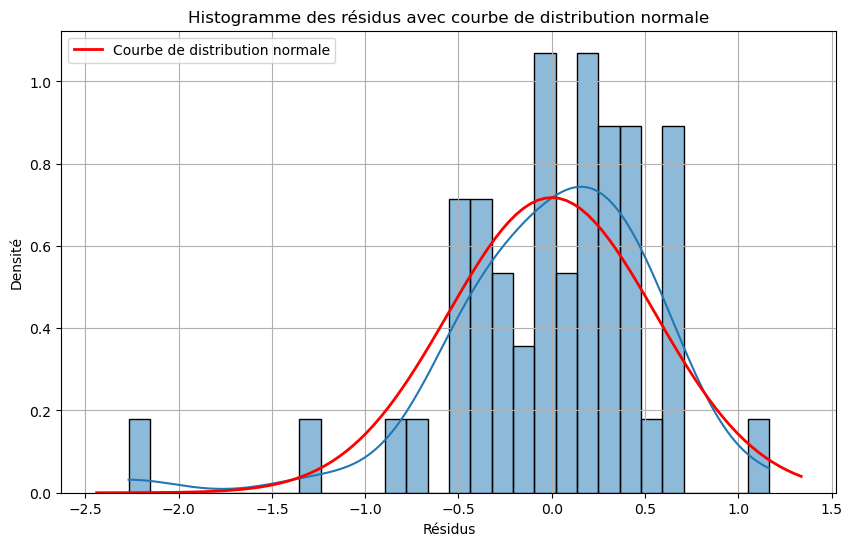

In [ ]:
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

**Intérprétation** 

On remarque que:

Histogramme des résidus montre la répartition des résidus (erreurs) de la régression, indiquant leur fréquence sur l'axe vertical.

 La majorité des résidus se situent près de zéro, ce qui est souhaitable pour une bonne modélisation.

En résumé le graphique indique que les résidus de la régression se distribuent de manière relativement normale.Autrement dit que les résidus suivent une distribution normale.

#### Étape 7 : Application des Tests 

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
    

  #####  1-Le test de Durbin-Watson 

Objectif du test : Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus d'une régression.

In [ ]:
# Test de Durbin-Watson (INDÉPENDANCE DES ERREURS ) 
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')



Test de Durbin-Watson: 2.018619483378296


**Intérprétation**

La valeur de La statistique de Durbin-Watson  : 2.2016 indique que les résidus ne présentent pas d'autocorrélation significative,Cela signifie que les résidus sont indépendants les uns des autres.

En Résumé le modèle est capable de prédire comment les variations de production influencent la santé économique d'un pays sans être biaisé par des erreurs systématiques.

##### 2-Le test de White 
   

Objectif : Le test de White vérifie l'homoscédasticité des résidus d'un modèle de régression.

In [ ]:
# Test de White pour (L’HOMOSCÉDASTICITÉ )
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))



{'LM statistic': 0.8308739326922673, 'p-value': 0.6600517972586873, 'f-statistic': 0.39672923326902776, 'f p-value': 0.6747949128414077}


**Intérprétation**


-La p-value est bien supérieure à 0.05 ,Cela renforce l'idée qu'il n'y a pas d'hétéroscédasticité dans le modèle, indiquant aussi que la variance des résidus est constante à travers les observations.

-L'absence d'hétéroscédasticité garantit que les erreurs de prévision ne varient pas en fonction des niveaux de production ou de BIP, ce qui renforce la robustesse des résultats du modèle.


####  Étape 8: Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [ ]:
#code ici
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     656.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           2.87e-29
Time:                        13:29:53   Log-Likelihood:                -40.758
No. Observations:                  49   AIC:                             85.52
Df Residuals:                      47   BIC:                             89.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.168     -0.666      0.5

**Intérprétation**


On remarque que l'équation de régression linéaire pour ce modèle est :
##### GDP = -0.1117  +  0.9739 *Production

##### a = -0.1117 
-Cela signifie que lorsque la production est nulle, le GDP est estimé à -0.1117, mais cette estimation n'est pas significative. 

##### b =  0.9739 
-Cela indique que pour chaque unité d'augmentation de la production, le GDP augmente en moyenne de 0.9739 unités

**R-squared**: 0.9775
Cela indique que 97,75 % de la variance de la variable dépendante (GDP) est expliquée par le modèle. C'est un bon ajustement.

**Statistique F : 656.8**
Une statistique F élevée indique que le modèle dans son ensemble est significatif. Cela signifie que les variables explicatives (ici, la production) ont un impact significatif sur le PIB.


####  Étape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

Objectif:Le MSE mesure la moyenne des carrés des erreurs entre les valeurs prédites par le modèle et les valeurs réelles. En d'autres termes, il quantifie la qualité des prédictions du modèle.

In [ ]:
from sklearn.metrics import mean_squared_error

# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')


Erreur Quadratique Moyenne (MSE): 0.3090426201614559


**Intérprétation**


Dans le contexte de la relation entre la production et le PIB, une MSE de 0.3094 signifie que les prédictions du modèle sont relativement proches des valeurs réelles.


#### Étape 10 : Coefficient de détermination (R²).

Objectif:Le R² mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle

In [ ]:
# Coefficient de détermination (R²)
r_squared = model.rsquared
print(f'Coefficient de détermination (R²): {r_squared}')


Coefficient de détermination (R²): 0.9332165736517442


**Intérprétation**

Un R² proche de 1 signifie que le modèle s'ajuste très bien aux données. 

-Dans ce cas 0.9332 indique que 93.32% de la variance du PIB est expliquée par la production.Suggèrant aussi que le modèle est capable de prédire la variable dépendante (PIB) en fonction de la production avec une grande précision.

#### Conclusion


En résumé,à travers la regression linéaire on a montrer bien l'exsistance d'une relation directe et positive entre la production et le PIB. Une production plus élevée conduit à un PIB plus élevé.

# Régression Ridge

### Problématique

Analyser Comment les indicateurs économiques de différents pays, telles que le revenu, les dépenses et les dépenses par fonction ect, influencent-elles le PIB des pays? 

ET comment la régularisation par régression Ridge peut-elle faciliter l'identification de relations significatives tout en améliorant la précision des estimations?

#### Étape 1: Importation des bibliothèques necessaires

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Étape 2: Chargement de données

In [ ]:

data = pd.read_csv('dataset_fin.csv')
df = pd.DataFrame(data)

In [ ]:
data.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


#### Etape3: Sélection des Variables

In [ ]:
# Variables explicatives
X = data[['Income', 'Components of aggregate demand', 'Expenditure', 'Production', 'Households', 'Government', 'Corporations', 'Capital','Government expenditure by fun']]

# Variable cible
y = data['GDP']

#### Étape 4: Évaluation de la Multicolinéarité avec VIF

Le rôle de l'évaluation de la multicolinéarité à travers le calcul du facteur d'inflation de la variance (VIF), est crucial pour répondre à la problématique de l'analyse de l'impact des différents variables explicatives sur le PIB. Voici comment cela se manifeste :

**Identification des Relations entre Variables** :

Le VIF permet d'identifier si les variables explicatives sont corrélées entre elles.Géneralement Une forte multicolinéarité peut rendre difficile la détermination de l'effet individuel de chaque variable sur la variable cible (le PIB).


In [ ]:
# Évaluation de la multicolinéarité avec VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_results = calculate_vif(X)
print("VIF Results:")
print(vif_results)

VIF Results:
                         Variable        VIF
0                          Income   1.405750
1  Components of aggregate demand  25.899816
2                     Expenditure  33.260355
3                      Production   7.937708
4                      Households  18.212370
5                      Government        inf
6                    Corporations   6.984738
7                         Capital  35.080917
8   Government expenditure by fun        inf


C:\Users\utilisateur\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**Interprétation des Résultats du VIF**

 **VIF< 5**:
 
 -Les résultats du VIF montrent que certaines variables, comme **Income**, présentent une faible multicolinéarité ((VIF = 1.405750) < 5), ce qui permet d'évaluer son impact sur le PIB de manière fiable.


 **5<VIF<10** :
 
D'autres, comme **Production** (VIF = 7.937708)et **Corporations**(VIF = 6.984738)ont une multicolinéarité modérée (5 < VIF < 10) L'impact sur le PIB peut être évalué mais nécessitant une certaine prudence dans l’interprétation. 




 **VIF > 10**:
 
En revanche, des variables telles que **Components of Aggregate Demand (VIF = 25.899816)**,**Expenditure (VIF = 33.260355)**,**Households (VIF = 18.212370)**et**Capital (VIF = 35.080917)**  affichent un VIF élevé (> 10), indiquantMulticolinéarité élevée. Ces variables sont fortement corrélée avec d'autres, rendant difficile l'isolement de l'impact individuel de chacun sur le PIB



**VIF = inf**:

 Enfin, des valeurs infinies (VIF = inf) pour certaines variables, comme **Government** et **Government Expenditure by Fun**, révèlent une colinéarité parfaite, ce qui peut rendre difficile l'estimation précise de leur impact sur le PIB. 
 


#### Étape 5: Séparation des Données

Cette étape divise les données en ensembles d'entraînement et de test, permettant d'évaluer les performances des modèles sur des données non vues.

In [ ]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Étape 6: Normalisation des données

Dans notre analyse , les variables peuvent avoir des unités et des plages de valeurs très différentes (par exemple, le revenu en milliers et les dépenses en millions). Standardiser les donnes  permet d'éviter que certaines variables dominent l'analyse simplement à cause de leur échelle.

In [ ]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Étape 7: Régression Classique

Dans le cadre de notre problématique, la régression classique fournit une première approche pour analyser l'impact de chaque variable explicative  sur le PIB.

In [ ]:

# Régression classique
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

#### Étape 8: Affichage des Coefficients de la Régression Linéaire

In [ ]:

# Afficher les coefficients de la régression linéaire
coefficients_linear = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient (Linear)'])
print("Coefficients de la Régression Linéaire:")
print(coefficients_linear)

Coefficients de la Régression Linéaire:
                                Coefficient (Linear)
Income                                      0.099650
Components of aggregate demand              0.262501
Expenditure                                -0.053378
Production                                  2.095101
Households                                 -0.328577
Government                                  0.046905
Corporations                                0.135829
Capital                                     0.109041
Government expenditure by fun               0.046905


Les coefficients de la régression linéaire fournissent des informations cruciales sur l'impact relatif de chaque variable explicative sur le PIB. Voici une interprétation de chaque coefficient et son importance :

**Income (Coefficient = 0.099650)** :
Interprétation : Une augmentation d'une unité dans le revenu est associée à une augmentation de 0.09965 unités du PIB. Cela indique un impact positif et significatif du revenu sur le PIB.

**Components of Aggregate Demand (Coefficient = 0.262501)** :
Interprétation : Cette variable a un coefficient positif élevé, suggérant qu'une augmentation des composants de la demande agrégée entraîne une augmentation substantielle du PIB. Cela souligne l'importance de la demande agrégée dans la croissance économique.

**Production (Coefficient = 2.095101)** :
Interprétation : Ce coefficient très élevé montre que la production a un impact majeur sur le PIB. Une augmentation d'une unité de production entraîne une augmentation de plus de 2 unités du PIB, soulignant son rôle central dans l'économie.

En somme, bien que les revenus , la composante de demende aggrée et  la production ont un impact beaucoup plus marqué, toutes les variables notament (les dépenses gouvernementales,les corporations et l'investissement en capital) ont des effets positifs et significatifs sur le PIB ,chacune à des degrés différents.


**Households (Coefficient = -0.328577)** :
Interprétation : Un coefficient négatif indique que les variations liées aux ménages ont un impact négatif sur le PIB. Cela pourrait suggérer que des dépenses de ménages peuvent nuire à la croissance économique.

**Expenditure (Coefficient = -0.053378)** :
Interprétation : Un coefficient négatif indique qu'une augmentation des dépenses est associée à une légère diminution du PIB. Cela peut sembler contre-intuitif et nécessite une analyse plus approfondie pour comprendre cette dynamique.



#### Étape 9: Régression ridge

La régression Ridge est essentielle pour obtenir des résultats plus fiables, surtout lorsque des corrélations élevées entre les variables peuvent fausser les résultats.

In [ ]:

# Régression Ridge
ridge_model = Ridge(alpha=1.0)  # Ajustez alpha selon vos besoins
ridge_model.fit(X_train_scaled, y_train)


Ridge()

#### Étape 10: Affichage des Coefficients de la Régression Ridge

In [ ]:

# Coefficients de la régression Ridge
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients (Régression Ridge):")
print(coefficients_ridge)


Coefficients (Régression Ridge):
                                Coefficient
Income                             0.093455
Components of aggregate demand     0.192340
Expenditure                        0.064755
Production                         1.994780
Households                        -0.313627
Government                         0.051668
Corporations                       0.114302
Capital                            0.125254
Government expenditure by fun      0.051668


Les coefficients montrent comment chaque variable influence le PIB.

**Income (Revenu)** : 0.0935
Pour chaque unité d'augmentation de revenu, le PIB augmente en moyenne de 0.0935 unités.

**Components of Aggregate Demand (Composantes de la Demande Agrégée)** : 0.1923
Une augmentation d'une unité dans les composantes de la demande agrégée est associée à une augmentation du PIB de 0.1923 unités.

**Production** : 1.9948
Pour chaque unité d'augmentation de la production, le PIB augmente de 1.9948 unités, ce qui indique un impact très significatif.

**Expenditure (Dépenses)** : 0.0648
Chaque unité d'augmentation des dépenses entraîne une augmentation du PIB de 0.0648 unités, montrant un impact positif et relativement faible.

En somme, bien que les revenus , la composante de demende aggrée et  la production ont un impact beaucoup plus marqué, toutes les variables notament (les dépenses gouvernementales,les corporations et l'investissement en capital) ont des effets positifs et significatifs sur le PIB ,chacune à des degrés différents.

**Households (Ménages)** : -0.3136
Une augmentation des variables associées aux ménages est liée à une diminution du PIB de 0.3136 unités, suggérant un effet négatif.



#### Étape 11: Comparaison entre la Régression  Classique et Ridge

In [ ]:

# Comparaison des coefficients
comparison = pd.concat([coefficients_linear, coefficients_ridge], axis=1)
comparison.columns = ['Régression Classique', 'Régression Ridge']
print("Comparaison des Coefficients:")
print(comparison)

Comparaison des Coefficients:
                                Régression Classique  Régression Ridge
Income                                      0.099650          0.093455
Components of aggregate demand              0.262501          0.192340
Expenditure                                -0.053378          0.064755
Production                                  2.095101          1.994780
Households                                 -0.328577         -0.313627
Government                                  0.046905          0.051668
Corporations                                0.135829          0.114302
Capital                                     0.109041          0.125254
Government expenditure by fun               0.046905          0.051668


Dans l'ensemble,les deux modèles montrent des impacts similaires pour la plupart des variables, la différence marquée pour les dépenses'Expenditure' souligne l'importance de la régularisation dans la régression Ridge. 

#### Explication de la différence marquée pour les dépenses

**Sans Régularisation (Régression Classique)**

-Dans le modèle classique, le coefficient des dépenses est négatif (-0.053378), suggérant qu'une augmentation des dépenses est associée à une légère diminution du PIB. Ce résultat peut donner l'impression que les dépenses sont nuisibles pour l'économie.

-Cependant, ce résultat peut être influencé par la **Multicolinéarité**, où des corrélations élevées entre les dépenses et d'autres variables comme le revenu ou la production complique l'évaluation de l'impact direct des dépenses sur le PIB. 
 
-Scénario : Supposons que le gouvernement augmente les dépenses pour un projet d'infrastructure. Cela entraîne une hausse de la production (les entreprises sont engagées) et du revenu (les travailleurs sont payés).

-Dans ce cas, le modèle classique pourrait attribuer une partie de l’augmentation du PIB à la production ou au revenu, masquant ainsi l'effet réel des dépenses elles-mêmes sur le PIB.

**Avec Régularisation (Régression Ridge)**

-Dans le modèle Ridge, le coefficient devient positif  (0.064755), indiquant qu'une augmentation des dépenses  entraîne une augmentation du PIB de 0.0648 unités, montrant un impact positif mais relativement faible.

-En appliquant une pénalité aux coefficients, la régression Ridge ajuste les effets des variables corrélées. Cela permet de mieux estimer l'effet direct des dépenses sur le PIB, indépendamment des effets confondants des autres variables (comme la production et le revenu).

-Scénario Révisé :lorsque le gouvernement augmente les dépenses vers des projets d'infrastructure, le modèle peut estimer que l'effet positif sur le PIB provient en grande partie de ces dépenses, même si la production et le revenu augmentent également.Ce qui n’était pas visible dans le modèle classique.


#### Résumé

En résumé, le passage d'un coefficient négatif à un coefficient positif pour  les dépenses "Expenditure" entre les deux modèles met en évidence les limitations de la régression classique, notamment face à la multicolinéarité  et souligne l'importance de la régularisation dans l'analyse des données économiques. Sans régularisation, les effets des dépenses peuvent être masqués par la multicolinéarité .
s.

Avec la régression Ridge, les interactions complexes entre les variables sont mieux prises en com en réduisant l'impact des multicolinéarités rendant ainsi nos résultats plus fiables en cas de corrélations élevées entre les variables,e, permettant une évaluation plus précise de l'impact des dépenses sur le PIB.

# ANOVA

### Problématique


Existe-t-il des différences significatives dans les niveaux de dépenses, c'est-à-dire les sommes d'argent allouées par les gouvernements, les entreprises ou les ménages pour divers besoins, entre les différents groupes de pays (émergents, développés et en développement) ?

#### Étape 1: Importation des bibliothèques nécessaires

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt


#### Étape 2: Chargement de jeu de données

In [ ]:

data = pd.read_csv('dataset_fin.csv')
df = pd.DataFrame(data)

In [ ]:
data.head()

,Unnamed: 0,Reference area,GDP,TIME_PERIOD,Income,Expenditure,Components of aggregate demand,Production,Households,Government,Government expenditure by fun,Corporations,Capital,Economic_Classification
0,0,Australia,3.441992,2022,2.630387,6.318369,3.090439,3.665822,39871.843115,37.198877,37.198877,2.826235,102.959793,Emerging
1,1,Austria,5.277894,2022,0.676556,4.911191,2.438285,6.070283,40299.683652,53.010387,53.010387,3.702775,102.748410,Emerging
2,2,Belgium,4.233432,2022,0.945041,3.635884,1.815193,4.515443,36499.838230,52.240785,52.240785,5.092422,102.937581,Developing
3,3,Canada,4.189036,2022,5.478162,5.464745,2.960486,4.139944,34203.373443,41.238013,41.238013,6.555331,103.696381,Emerging
4,4,Chile,2.058740,2022,-1.181835,1.642339,1.019797,2.282649,16552.007381,27.749244,27.749244,4.490536,103.703984,Developing


In [ ]:
data.columns = data.columns.str.strip()  # Supprime les espaces
print(data.columns.tolist())  # Affiche les noms de colonnes

['Unnamed: 0', 'Reference area', 'GDP', 'TIME_PERIOD', 'Income', 'Expenditure', 'Components of aggregate demand', 'Production', 'Households', 'Government', 'Government expenditure by fun', 'Corporations', 'Capital', 'Economic_Classification']


In [ ]:
print(data.columns)  # Pour voir les noms de colonnes exacts

Index(['Unnamed: 0', 'Reference area', 'GDP', 'TIME_PERIOD', 'Income',
       'Expenditure', 'Components of aggregate demand', 'Production',
       'Households', 'Government', 'Government expenditure by fun',
       'Corporations', 'Capital', 'Economic_Classification'],
      dtype='object')


In [ ]:
# Renommer les colonnes pour enlever les espaces
df.columns = df.columns.str.strip()

#### Étape 3: Formulation des Hypothèses

Avant de procéder à l'analyse exploratoire des données, nous formulons les hypothèses suivantes :

- **Hypothèse Nulle (H0)** : Il n'y a pas de différence significative dans les dépenses  entre les différents groupes de classification économique (Emerging, Developing, Developed).
- **Hypothèse Alternative (H1)** : Il existe au moins une différence significative dans les dépenses entre les groupes de classification économique.

#### Étape 4: Visualisation Préliminaire

Rôle du Boxplot Avant l'ANOVA

Exploration Visuelle :
Le boxplot permet d'explorer visuellement la distribution des données avant d'appliquer l'ANOVA. Cela aide à comprendre les tendances et les variations au sein de chaque groupe.

Identification des Différences :
Il met en évidence les différences potentielles entre les groupes, ce qui peut justifier l'application d'ANOVA pour tester l'hypothèse selon laquelle les moyennes des groupes sont égales.

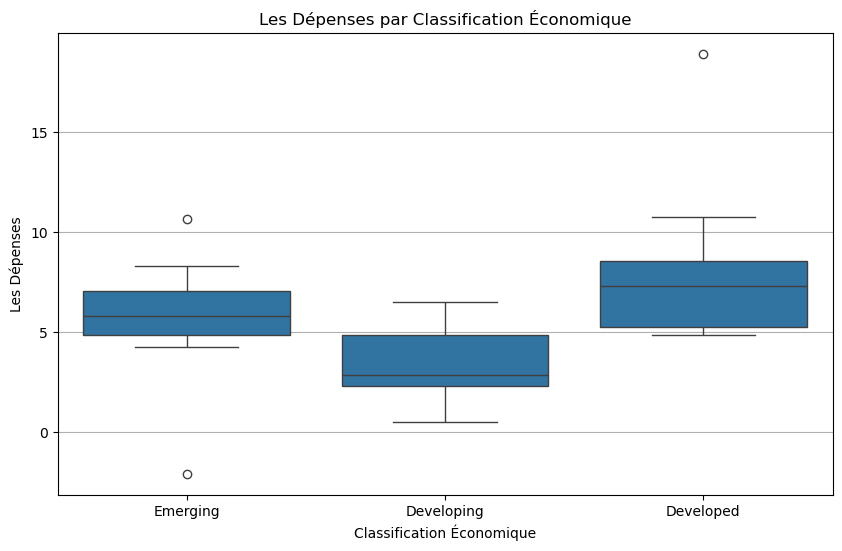

In [ ]:
# Créer un boxplot pour visualiser les dépenses par classification économique
plt.figure(figsize=(10, 6))
sns.boxplot(x='Economic_Classification', y='Expenditure', data=df)
plt.title('Les Dépenses par Classification Économique')
plt.xlabel('Classification Économique')
plt.ylabel('Les Dépenses')
plt.grid(axis='y')
plt.show()

**Interprétation des résultats**

Les boxplots montre clairement qu'il existe des différences notables dans les niveaux de dépenses  entre les trois classifications économiques.

On observe que les dépenses dans les groupes se diffère:

Developing (En développement) : La médiane des dépenses est légèrement inférieure à 5.

Emerging (Émergents) : La médiane se situe autour de 5.

Developed (Développés) : La médiane est d'environ 10.

Valeurs Aberrantes :
Les points au-dessus ou en dessous des "whiskers" (tassons) sont des valeurs aberrantes, signalant des dépenses qui sont significativement plus élevées ou plus faibles que le reste des données.

Ces résultats soulignent l'influence des classifications économiques sur les dépenses gouvernementales.
les pays développés dépensent en moyenne plus que les pays émergents , qui eux-mêmes dépensent plus que les pays en développement.

#### Étape 4: ANOVA

Les différences observées dans les dépenses entre les groupes justifient l'application de l'ANOVA pour tester statistiquement si ces différences sont significatives, renforçant la validité des analyses.

In [ ]:

model = ols('Expenditure ~ C(Economic_Classification)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:

# Afficher la table ANOVA
print(anova_table)

                                sum_sq    df         F    PR(>F)
C(Economic_Classification)  177.284689   2.0  12.45836  0.000047
Residual                    327.294098  46.0       NaN       NaN


**Interprétation des résultats**

Statistique F :
F : 12.45836
La valeur F est le rapport de la variabilité entre les groupes à la variabilité au sein des groupes. Une valeur F élevée suggère que les différences entre les groupes sont plus grandes que la variabilité interne, ce qui est un indicateur fort de l'existence de différences significatives.

Valeur p (PR(>F)) :
PR(>F) : 0.000047
La valeur p est très inférieure au seuil conventionnel de 0.05, ce qui permet de rejeter l'hypothèse nulle. Cela signifie qu'il existe des différences significatives dans les dépenses  selon la classification économique.


#### Résumé

Ces résultats  de l'ANOVA  permettent de répondre à la problématique en illustrant  qu'il existe des différences significatives dans les dépenses  selon la classification économique.